<a href="https://colab.research.google.com/github/kimannv42/Waiter-s-Tip-Prediction./blob/main/Waiter%E2%80%99s_Tip_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection & Preparation**

**Importing Libraries**

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

 **Import the csv file**

In [ ]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,party_size,day,time,smoker,gender,tip
0,1878.955193,8,Sunday,Dinner,No,Female,322.674504
1,4754.064389,9,Saturday,Lunch,Yes,Female,571.242450
2,3662.649770,6,Friday,Dinner,Yes,Male,374.741785
3,2997.305836,10,Monday,Lunch,No,Male,554.335028
4,788.533016,2,Monday,Lunch,Yes,Female,176.050147


In [ ]:
df.shape

(200000, 7)

# **Exploratory Data Analysis (EDA) & Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   total_bill  200000 non-null  float64
 1   party_size  200000 non-null  int64  
 2   day         200000 non-null  object 
 3   time        200000 non-null  object 
 4   smoker      200000 non-null  object 
 5   gender      200000 non-null  object 
 6   tip         200000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.7+ MB


In [ ]:
df.describe()

,total_bill,party_size,tip
count,200000.000000,200000.000000,200000.000000
mean,2507.041822,5.496610,438.519498
std,1439.701754,2.869606,281.319133
min,10.023845,1.000000,1.025480
25%,1258.085502,3.000000,205.649843
50%,2510.851670,5.000000,410.123665
75%,3752.120791,8.000000,632.493259
max,4999.960291,10.000000,1247.411203


In [ ]:
df.isnull().sum()

,0
total_bill,0
party_size,0
day,0
time,0
smoker,0
gender,0
tip,0


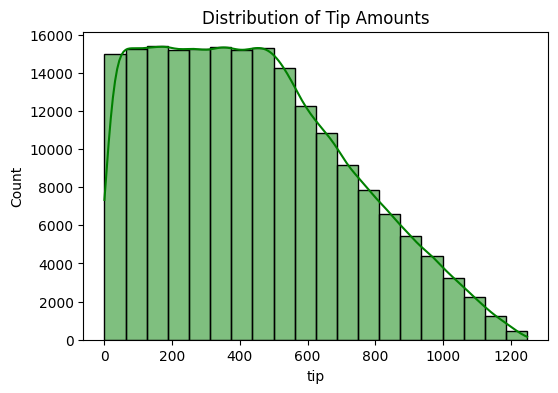

In [ ]:
# Data Visualization: Distribution of Tip Amounts
plt.figure(figsize=(6, 4))
sns.histplot(df["tip"], bins=20, kde=True, color="green")
plt.title("Distribution of Tip Amounts")
plt.show()

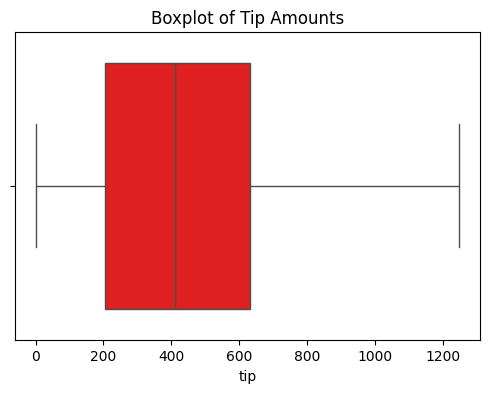

In [ ]:
# Boxplot to Identify Outliers in Tip Amounts
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["tip"], color="red")
plt.title("Boxplot of Tip Amounts")
plt.show()

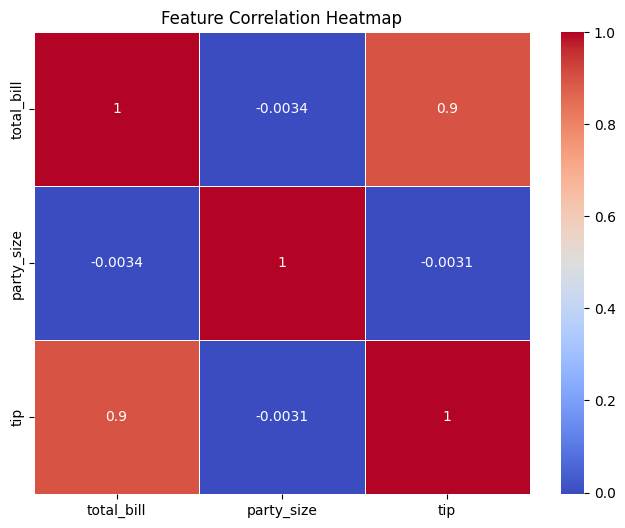

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", linewidths=0.5) # Select only numeric columns for correlation calculation
plt.title("Feature Correlation Heatmap")
plt.show()

# **Feature Selection**

In [ ]:
# Update categorical feature names based on dataset
categorical_features = ["day", "time", "smoker", "sex"]
numerical_features = ["total_bill", "size"]

# Apply one-hot encoding only if the columns exist
df = pd.get_dummies(df, columns=[col for col in categorical_features if col in df.columns], drop_first=True)

print("After One-Hot Encoding:\n", df.head())

After One-Hot Encoding:
     total_bill  party_size  gender         tip  day_Monday  day_Saturday  \
0  1878.955193           8  Female  322.674504       False         False   
1  4754.064389           9  Female  571.242450       False          True   
2  3662.649770           6    Male  374.741785       False         False   
3  2997.305836          10    Male  554.335028        True         False   
4   788.533016           2  Female  176.050147        True         False   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  time_Lunch  \
0        True         False        False          False       False   
1       False         False        False          False        True   
2       False         False        False          False       False   
3       False         False        False          False        True   
4       False         False        False          False        True   

   smoker_Yes  
0       False  
1        True  
2        True  
3       False  
4        Tr

# **Building the Machine Learning Model**

In [ ]:
numerical_features = ["total_bill", "party_size"]
# Create a list of features to be used in the model
all_features = numerical_features + categorical_features

# Select only these features from the DataFrame
# Instead of using original categorical features, use the one-hot encoded columns
encoded_categorical_features = [col for col in df.columns if col.startswith(('day_', 'time_', 'smoker_', 'sex_'))]
all_encoded_features = numerical_features + encoded_categorical_features

df_selected = df[all_encoded_features + ['tip']]  # Include 'tip' for the target variable

# No need to apply one-hot encoding again as it's already done
# df_encoded = pd.get_dummies(df_selected, columns=categorical_features, drop_first=True)

# Separate features and target variable
X = df_selected.drop('tip', axis=1)
y = df_selected['tip']

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using a ColumnTransformer
# This ensures only numerical columns are scaled
ct = ColumnTransformer(
    [('scaler', StandardScaler(), numerical_features)], # Apply StandardScaler only to numerical_features
    remainder='passthrough' # Leave other columns unchanged
)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Model Evaluation**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 306.14
Mean Squared Error: 142056.10
Root Mean Squared Error: 376.90
R-squared: -0.7936


In [ ]:
features = df.drop('tip', axis=1)
target = df['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape

((160000, 11), (40000, 11))

In [ ]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the numerical features of the validation data
X_val[numerical_features] = scaler.transform(X_val[numerical_features])


In [ ]:
# Initialize and train the model
models = [LinearRegression(), RandomForestRegressor(), AdaBoostRegressor()]

# Create a list of numerical features
# (assuming 'total_bill' and 'party_size' are the only numerical features)
numerical_features = ['total_bill', 'party_size']

# Create a ColumnTransformer to scale numerical features and one-hot encode categorical features
ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features),  # Scale numerical features
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col for col in X_train.columns if col not in numerical_features]),  # One-hot encode categorical features
    ],
    remainder='passthrough'  # Pass through any remaining columns
)


for i in range(3):
    # Apply the ColumnTransformer to the training and validation data
    X_train_transformed = ct.fit_transform(X_train)
    X_val_transformed = ct.transform(X_val)

    # Fit the model using the transformed data
    models[i].fit(X_train_transformed, Y_train)
    print(f'{models[i]} : ')

    # Make predictions using the transformed data
    pred_train = models[i].predict(X_train_transformed)
    print('Training Accuracy : ', mean_absolute_error(Y_train, pred_train))

    pred_val = models[i].predict(X_val_transformed)
    print('Validation Accuracy : ', mean_absolute_error(Y_val, pred_val))
    print()

LinearRegression() : 
Training Accuracy :  93.87505333531625
Validation Accuracy :  93.63873186492457

RandomForestRegressor() : 
Training Accuracy :  36.173873474652574
Validation Accuracy :  97.4846491208272

AdaBoostRegressor() : 
Training Accuracy :  97.59873255981287
Validation Accuracy :  97.41863471981878

